In [30]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
#Creating dataset for Test
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

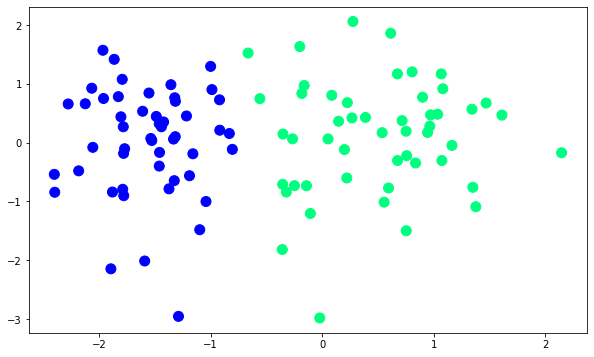

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [45]:
# Importing LogesticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none',solver='sag')

In [46]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[[13.47176189  0.98832547]]
[8.92961297]


C:\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [47]:
#Orignal Cofficent anf Intercept
m1 = -(lr.coef_[0][0]/lr.coef_[0][1])
b1 = -(lr.intercept_/lr.coef_[0][1])

In [48]:
#Creating Values For Line LogisticRegression
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [49]:
# Creating Gredient Decient Regressor 
def sigmoid(z):
    """Appling sigmoid Function and return Converted value"""
    return 1/(1+np.exp(-z))

def GDLogistic(X,y):
    """Take X and Y value and return Cofficent and Intercept After applying Logistic Gradient Decient"""
    #Adding One in First Column for Wo
    X = np.insert(X,0,1,axis=1)
    #Initilization of Weights
    Weights = np.ones(X.shape[1])
    
    #learning Rate
    learningRate = 0.5
    
    for i in range(5000):
        #Calculating Y_hat using Sigmoid Fnction
        Y_hat = sigmoid(np.dot(X,Weights))
        #updating Weights using Batch Gradient Decients Methods
        Weights = Weights + learningRate*(np.dot((y-Y_hat),X)/X.shape[0])
        
    return Weights[1:],Weights[0] #(Cofficent, Intercept)

In [50]:
coef_, intercept_ = GDLogistic(X,y)

In [51]:
print(coef_,intercept_)

[11.9130685   0.80686829] 7.890931726180508


In [52]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [53]:
#Pridicting Values for Our Logistic Regression
X_my = np.linspace(-3,3,100)
y_my = m*X_my + b

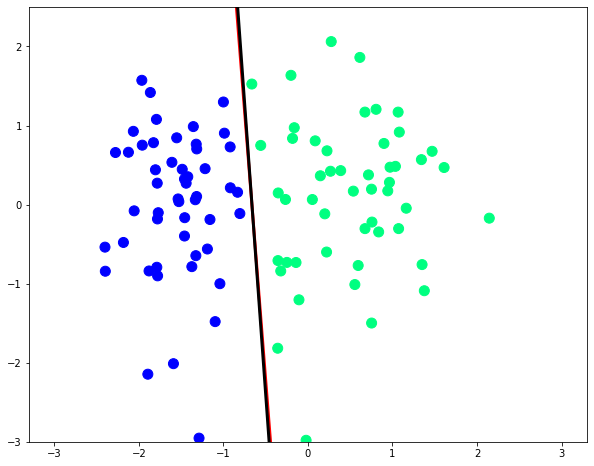

In [56]:
#Plotting Both values and Pridicted values:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(X_my,y_my,color='black',linewidth=3)
plt.ylim(-3,2.5)
plt.show()